In [1]:
from src.functions import *

# Global setting
with open(projectdir+'setting.json', 'r') as f:
    setting = json.load(f)
    _gamma = setting["gamma"]
    _T = setting["T"]
    _t = setting["t"]
    _num_random_models = setting["num_random_models"]

# Load the JSON file
with open(projectdir+'instances.json', 'r') as f:
    instances = json.load(f)

In [2]:
# n_arr = [3, 4, 5, 6, 7, 8, 9, 10, 11]
n_arr = [3, 4, 5, 6]

time_lims = (0,100) # Range of time values
time_steps = 1000
time_range = np.linspace(time_lims[0], time_lims[1], time_steps)

In [3]:
# NOTE: We evaluate the algorithm on the SAME 100 random instances for each point

In [4]:
def f(t,n):
    '''
    Calculate spectral gaps for quantum proposal.
    f(t) is defined to parallelize the time-loop.
    '''    
    delta_quantum_arr = np.zeros(_num_random_models)
    for i, instance in enumerate(instances[f'{n}']):
        m = IsingModel.from_coefficients(n, instance)
        # Calculate delta for quantum proposal
        proposal_mat_quantum = get_proposal_mat_quantum(m, _gamma, t)
        P_quantum = get_transition_matrix(m, _T, proposal_mat_quantum)
        delta_quantum = get_delta(P_quantum)
        delta_quantum_arr[i] = delta_quantum
    return delta_quantum_arr


In [5]:
delta_quantum_arr = np.zeros((len(n_arr), time_steps, _num_random_models))
for n_id, n in tqdm(enumerate(n_arr)):
    delta_quantum_arr[n_id] = np.asarray(joblib.Parallel(n_jobs=-1)(joblib.delayed(f)(t,n) for t in time_range))

0it [00:00, ?it/s]

1it [00:47, 47.10s/it]

2it [01:10, 32.91s/it]

3it [01:32, 28.26s/it]

4it [02:19, 35.60s/it]

4it [02:19, 34.91s/it]

# Save the data

In [6]:
filename = f'data/delta_vs_t.json'

grid_search_n = {
    'delta': delta_quantum_arr.tolist(),
    'qubits_range': n_arr,
    'num_random_models': _num_random_models,
    'time_range': time_range.tolist(),
    'T': _T,
    'gamma': _gamma
}

save_in_json(grid_search_n, filename)

# Average and plot the results

In [7]:
delta_quantum_arr_avg = np.mean(delta_quantum_arr, axis=2)
delta_quantum_arr_std = np.std(delta_quantum_arr, axis=2, ddof=1)

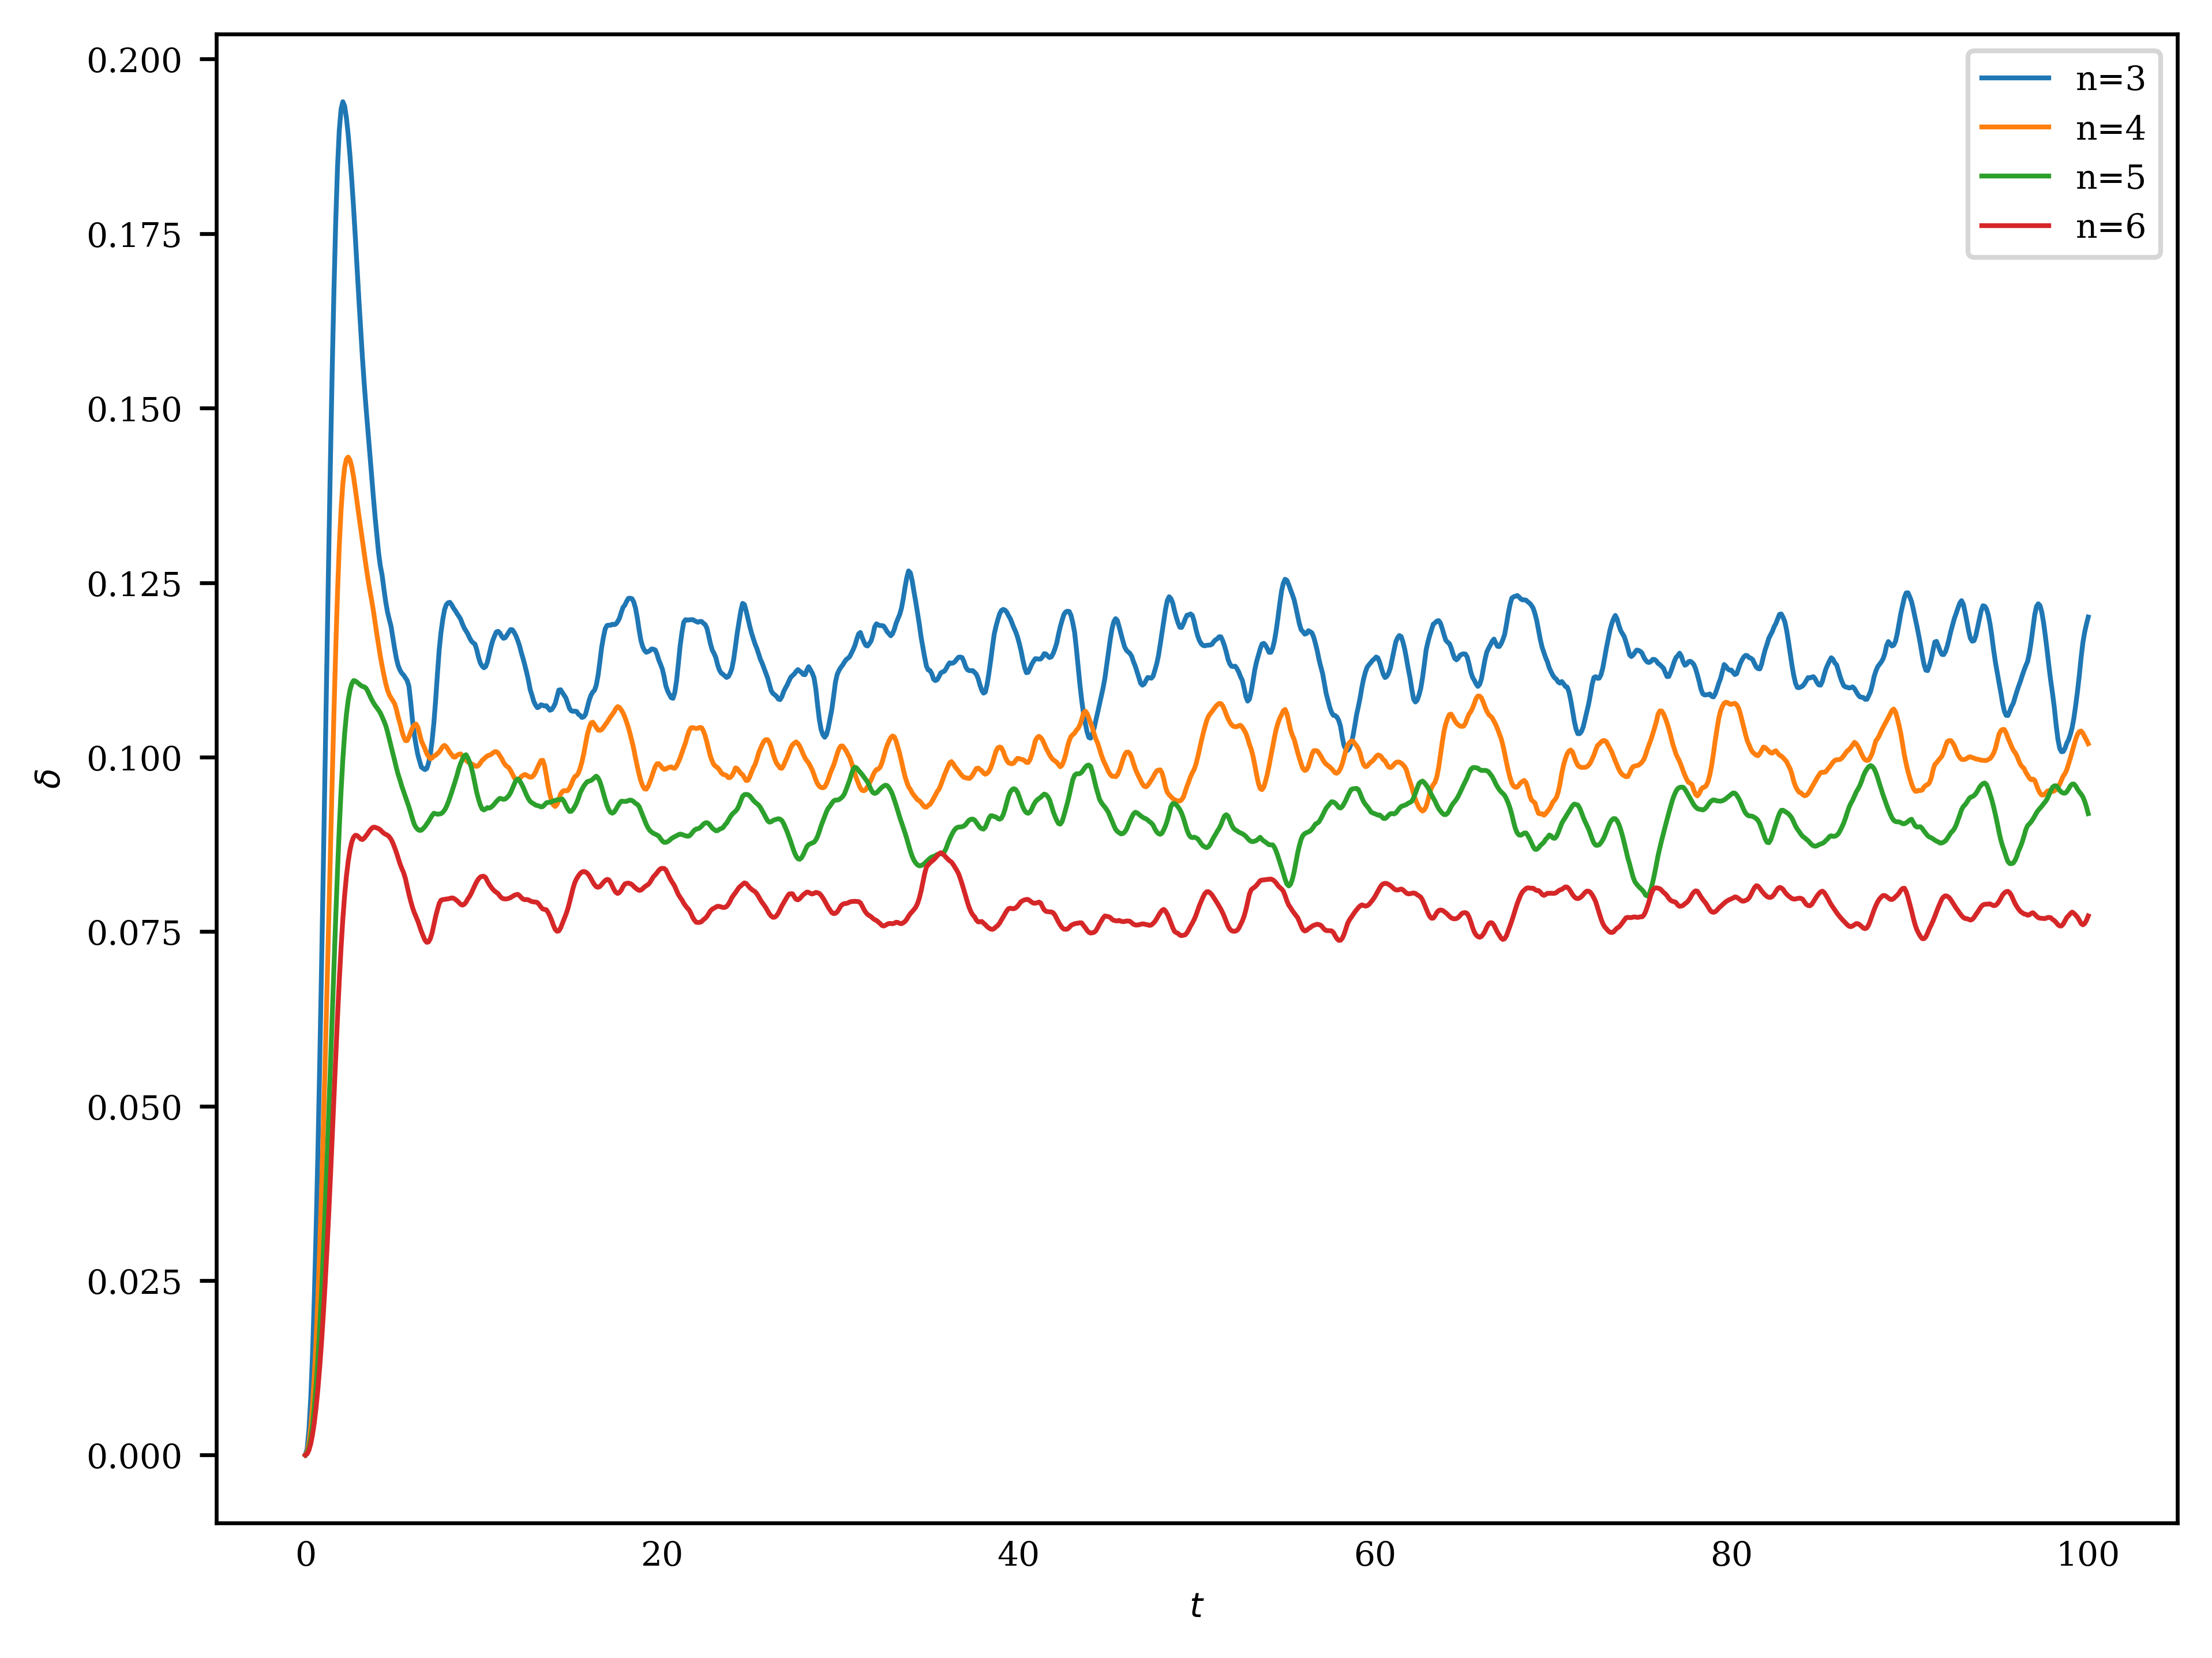

In [8]:
fig = plt.figure()

for n_id, n in enumerate(n_arr):
    plt.plot(time_range, 
            delta_quantum_arr_avg[n_id], 
            label=f'n={n}')

plt.xlabel('$t$')
plt.ylabel('$\delta$')
# plt.xscale('log')
plt.legend()

fig.tight_layout()

# fig.savefig(local_path+f'figures/grid_search_n{n}')

In [9]:
# t_opt_arr = [time_range[np.argmin(time_range / delta_quantum_arr_avg[n_id])] for n_id in range(len(n_arr))]
# plt.plot(n_arr, t_opt_arr, '.--')

In [10]:
# fig = plt.figure()

# for n_id, n in enumerate(n_arr):
#     plt.plot(time_range, 
#             delta_quantum_arr_avg[n_id] / time_range, 
#             label=f'n={n}')

# # plt.xscale('log')
# plt.xlabel('$t$')
# plt.ylabel('$\delta$ \ t')
# plt.xscale('log')
# plt.legend()

# fig.tight_layout()

# # fig.savefig(local_path+f'figures/grid_search_n{n}')